# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

### MNIST with Keras

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**. 

### Exercise 12.1

Change at will and train your DNN by increasing the number of epochs to an adeuqate value. Try to use at least two other optimizers, different from SGD: watch to accuracy and loss for training and validation data and comment on the performances.

#### Step 1: Load and Process the Data

Keras can conveniently download the MNIST data from the web. All we need to do is import the `mnist` module and use the `load_data()` class, and it will create the training and test data sets or us.

The MNIST set has pre-defined test and training sets, in order to facilitate the comparison of the performance of different models on the data.

Once we have loaded the data, we need to format it in the correct shape.

#### Reshape data and convert labels to be used with categorical cross entropy

#### Step 2: Define the Neural Net and its Architecture

We can now move on to construct our deep neural net. We shall use Keras's `Sequential()` class to instantiate a model, and will add different deep layers one by one using the `add()` method

For the purposes of our example, it suffices to focus on `Dense` layers for simplicity. Every `Dense()` layer accepts as its first required argument an integer which specifies the number of neurons. The type of activation function for the layer is defined using the `activation` optional argument, the input of which is the name of the activation function in `string` format. Examples include `relu`, `tanh`, `elu`, `sigmoid`, `softmax`. 

In order for our DNN to work properly, we have to make sure that the numbers of input and output neurons for each layer match. Therefore, we specify the shape of the input in the first layer of the model explicitly using the optional argument `input_shape=(N_features,)`. The sequential construction of the model then allows Keras to infer the correct input/output dimensions of all hidden layers automatically. Hence, we only need to specify the size of the softmax output layer to match the number of categories.

#### Step 3: Choose the Optimizer and the Cost Function

Next, we choose the loss function according to which to train the DNN. For classification problems, this is the cross entropy, and since the output data was cast in categorical form, we choose the `categorical_crossentropy` defined in Keras' `losses` module. Depending on the problem of interest one can pick any other suitable loss function. To optimize the weights of the net, we choose SGD. This algorithm is already available to use under Keras' `optimizers` module, but we could use any other built-in one as well. The parameters for the optimizer, such as `lr` (learning rate) or `momentum` are passed using the corresponding optional arguments of the `SGD()` function. All available arguments can be found in Keras' online documentation at [https://keras.io/](https://keras.io/). While the loss function and the optimizer are essential for the training procedure, to test the performance of the model one may want to look at a particular `metric` of performance. For instance, in categorical tasks one typically looks at their `accuracy`, which is defined as the percentage of correctly classified data points. To complete the definition of our model, we use the `compile()` method, with optional arguments for the `optimizer`, `loss`, and the validation `metric` as follows:

#### Step 4: Train the model

We train our DNN in minibatches. 

Shuffling the training data during training improves stability of the model. Thus, we train over a number of training epochs. Each epoch corresponds to using **all the train data** divided in minibatches.

Training the DNN is a one-liner using the `fit()` method of the `Sequential` class. The first two required arguments are the training input and output data. As optional arguments, we specify the mini-`batch_size`, the number of training `epochs`, and the test or `validation_data`. To monitor the training procedure for every epoch, we set `verbose=True`. 

#### Step 5: Evaluate the Model Performance on the *Unseen* Test Data

Next, we evaluate the model and read of the loss on the test data, and its accuracy using the `evaluate()` method.

---
### Risoluzione
---

In questo esercizio ho sviluppato delle **Deep Neural Network (DNN)** per il riconoscimento di immaggini, nello specifico per il riconoscimento di tutte le cifre da $0$ a $9$ raffigurate in immagini $28x28$ con scritta bianca su sfondo nero. L'architettura delle **DNN** è uguale per tutti i modelli eccezion fatta per l'**ottimizzatore** e il numero di **epoche** che sono stati confrontati esplorando le seguenti possibilità:
- **Ottimizzatore**: `SGD`, `Adam` o `Adagrad`
- $N_{epoche}=[10,20,30]$

L'architettura di tutte le **DNN** è mantenuta invariata e composta da:
- un layer `Dense(400,input_shape=(img_rows*img_cols,), activation='relu')`
- un layer `Dense(100, activation='relu')`
- un layer `Dropout(0.5)`
- un layer `Dense(num_classes, activation='softmax')`

Viene utilizzata la funzione loss `categorical_crossentropy`

In [109]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import os
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [100]:
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'axes.axisbelow': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15,
    'savefig.directory':'./Images'
})

In [122]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


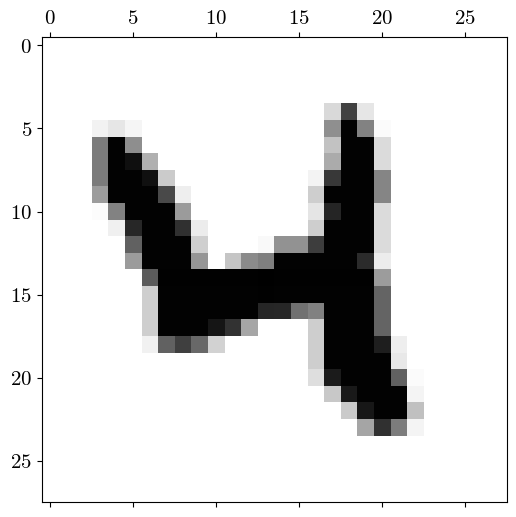

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [124]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [104]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [108]:
model_DNN = [[]]
history = [[]]

In [105]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    return model


In [107]:
n_ep = [10,20,30]
opt = ['SGD','Adam','Adagrad']
l_e = len(n_ep)
l_o = len(opt)

In [ ]:
# training parameters
batch_size = 32

# create the deep neural net
for i in range(0,l_e):
    model_DNN.append([])
    history.append([])
    for j in range(0,l_o):
        model_DNN[i].append(compile_model(opt[j]))
        history[i].append(model_DNN[i][j].fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=n_ep[i],
          verbose=0,
          validation_data=(X_test, Y_test)))
        model_DNN[i][j].save('DNN/model_DNN_'+str(i)+'_'+str(j)+'.keras')
        hist_df = pd.DataFrame(history[i][j].history)
        with open('history_'+str(i)+'_'+str(j)+'.csv',mode='w') as f:
            hist_df.to_csv(f)

/Users/giovannigalafassi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
for i in range(0,l_e):
    for j in range(0,l_o):
        model_DNN[i][j] = keras.models.load_model('DNN/model_DNN_'+str(i)+'_'+str(j)+'.keras')

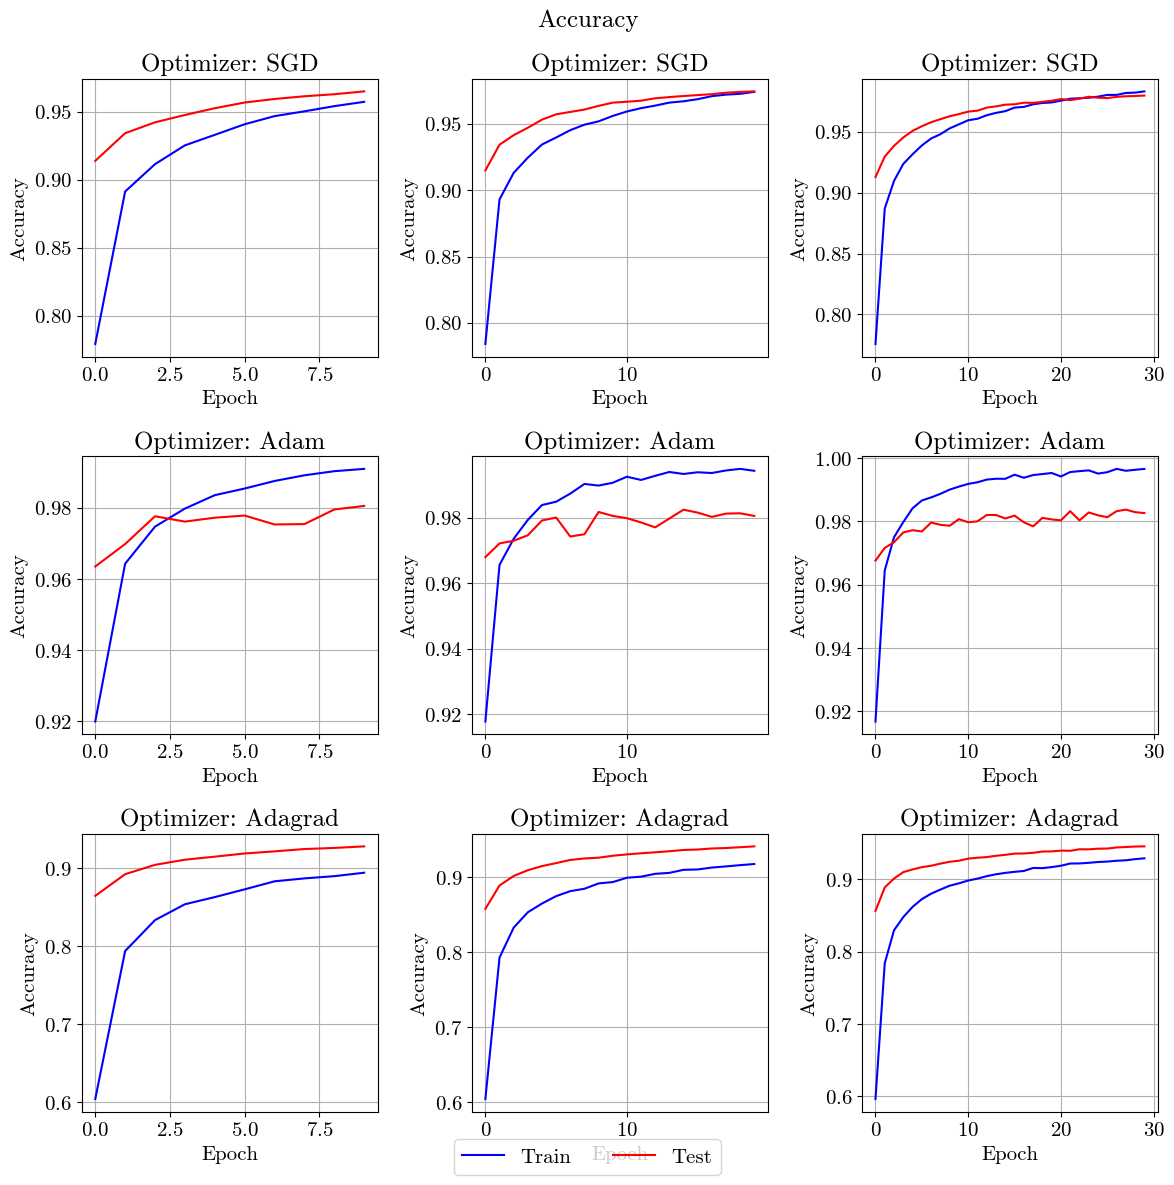

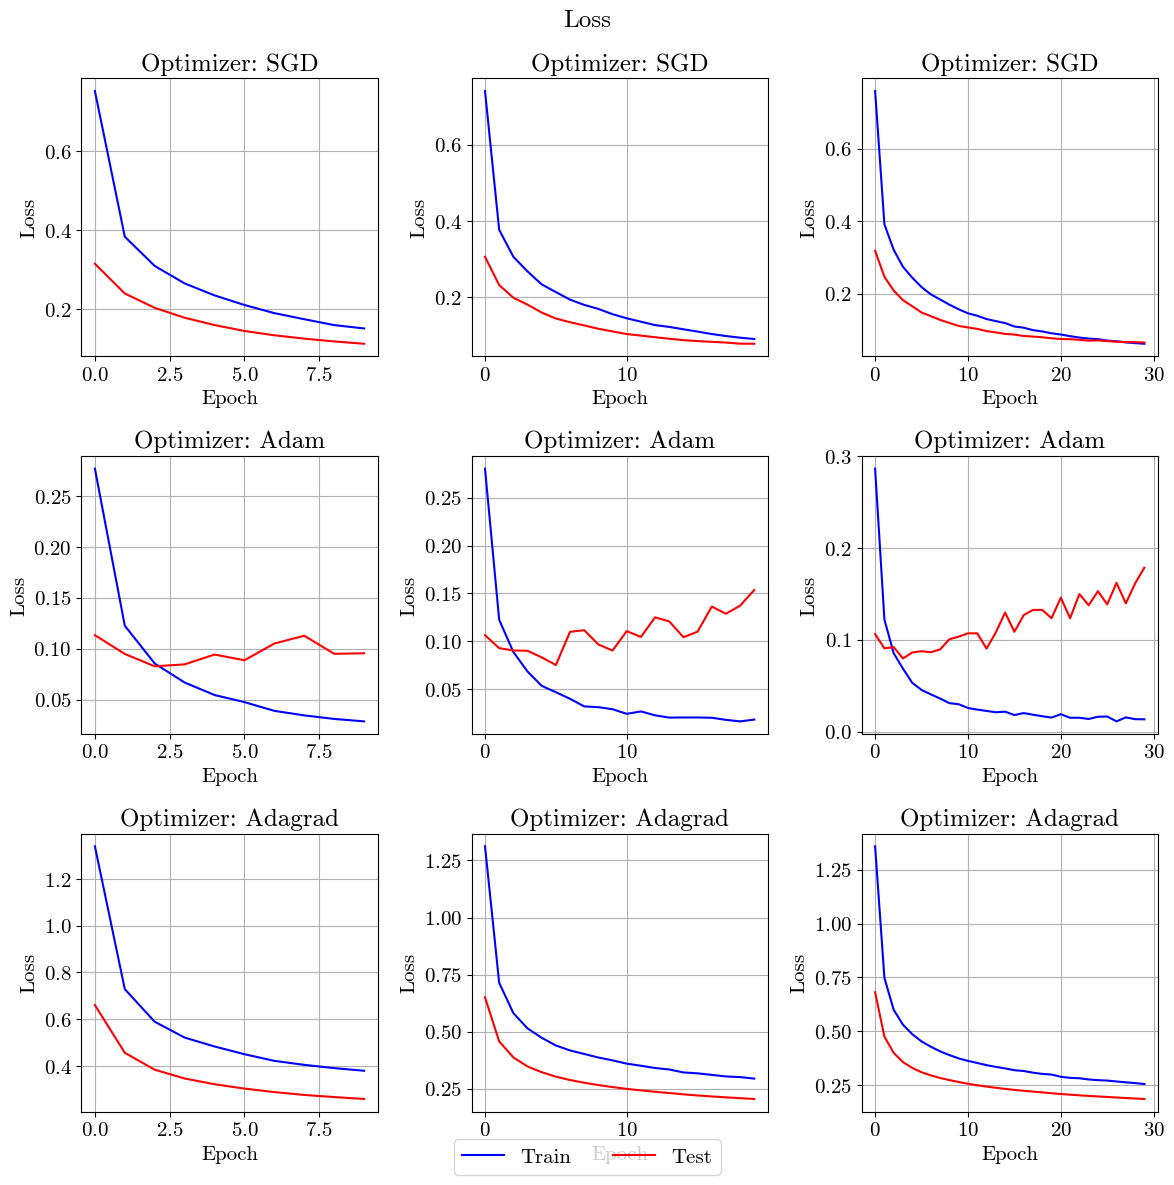

In [114]:
# summarize history for accuracy
plt.figure(figsize=(12,12))
for i in range(0,l_e):
    for j in range(0,l_o):
        plt.subplot(l_e,l_o,j*l_o+i+1)
        plt.plot(history[j][i].history['acc'],color='b')
        plt.plot(history[j][i].history['val_acc'],color='r')
        plt.title('Optimizer: '+str(opt[j]))
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.grid()
plt.suptitle('Accuracy')
plt.figlegend(['Train', 'Test'], loc='lower center',ncol=2)
plt.tight_layout()
plt.show()

# summarize history for loss
plt.figure(figsize=(12,12))
for i in range(0,l_e):
    for j in range(0,l_o):
        plt.subplot(l_e,l_o,j*l_o+i+1)
        plt.plot(history[j][i].history['loss'],color='b')
        plt.plot(history[j][i].history['val_loss'],color='r')
        plt.title('Optimizer: '+str(opt[j]))
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.grid()
plt.suptitle('Loss')
plt.figlegend(['Train', 'Test'], loc='lower center',ncol=2)
plt.tight_layout()
plt.show()

In [128]:
# evaluate model
score = model_DNN[1][0].evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.09554576128721237
Test accuracy: 0.9804999828338623


L'andamento di **Loss** e **Accuracy** mi fanno identificare `Adam` come miglior ottimizzatore anche per il fatto che necessita di solo $10$ epoche per *training* e *test*. Osserviamo quindi le predizioni effettuate da questo modello.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


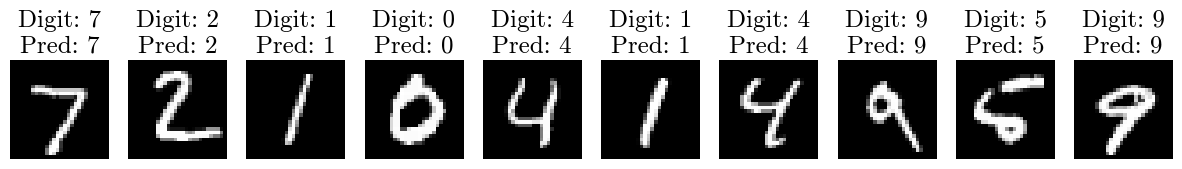

In [127]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN[1][0].predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPred: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

#### Creating Convolutional Neural Nets with Keras

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, but also *translational invariance*, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [140]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers.

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

---
### Risoluzione
---

Per implementare una **Convolutional Neural Network (CNN)**, al primo layer `Conv2D` aggiunto un layer `MaxPooling2D`, un `Flatten()`, uno standard `Dense(activation='relu')` e un layer di output `Dense(10,activation='softmax')`.
Poichè la predizioni non si mostrava ottimale per tutte le cifre scritte a mano ho deciso di aggiungere un ulteriore layer convolutivo prima di `Flatten()`.

Per quanto ottenuto nella prima parte ho deciso di utilizzate l'ottimizzatore `Adam` allenato per $10$ epoche

In [132]:
#THIS IS INCOMPLETE ... COMPLETE BEFORE EXECUTING IT

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    model.add(MaxPooling2D(pool_size=(3,3),strides=None,padding='valid'))
    model.add(Conv2D(20, kernel_size=(2, 2),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(20,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['acc'])
    return model

Train your DCNN and evaluate its performance proceeding exactly as before:

In [133]:
# training parameters
batch_size = 32
epochs = 10# INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
hs = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
hist_df = pd.DataFrame(hs.history)
with open('history_CNN.csv',mode='w') as f:
    hist_df.to_csv(f)


/Users/giovannigalafassi/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - acc: 0.8520 - loss: 0.4913 - val_acc: 0.9801 - val_loss: 0.0678
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.9749 - loss: 0.0858 - val_acc: 0.9830 - val_loss: 0.0536
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.9808 - loss: 0.0626 - val_acc: 0.9854 - val_loss: 0.0473
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - acc: 0.9856 - loss: 0.0492 - val_acc: 0.9868 - val_loss: 0.0437
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - acc: 0.9880 - loss: 0.0406 - val_acc: 0.9871 - val_loss: 0.0416
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - acc: 0.9892 - loss: 0.0344 - val_acc: 0.9873 - val_loss: 0.0409
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.9915 - loss: 0.0290 - val_acc: 0.9872 - val_loss: 0.0407
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - acc: 0.9921 - loss: 0.0251 - val_acc: 0.9870 - val_loss: 0.0401
Epoch 9/10
1875/1875 ━━━

In [134]:

model_CNN.save('model_CNN.keras')


In [14]:
model_CNN = keras.models.load_model('model_CNN.keras')

In [135]:

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9830 - loss: 0.0568

Test loss: 0.04687223210930824
Test accuracy: 0.986299991607666


 20/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9899 - loss: 0.0271

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9830 - loss: 0.0568

Test loss: 0.04687223210930824
Test accuracy: 0.986299991607666


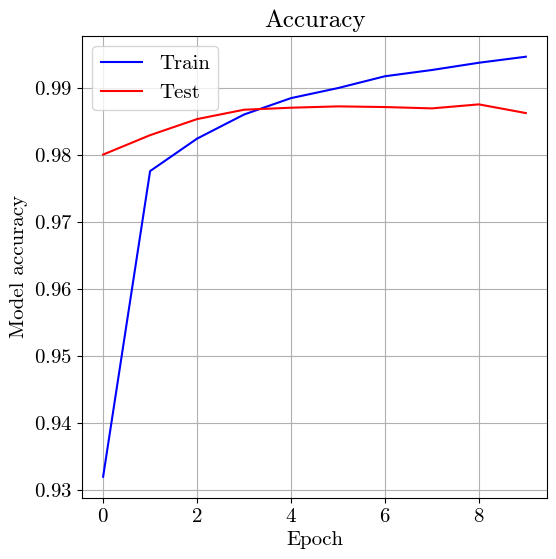

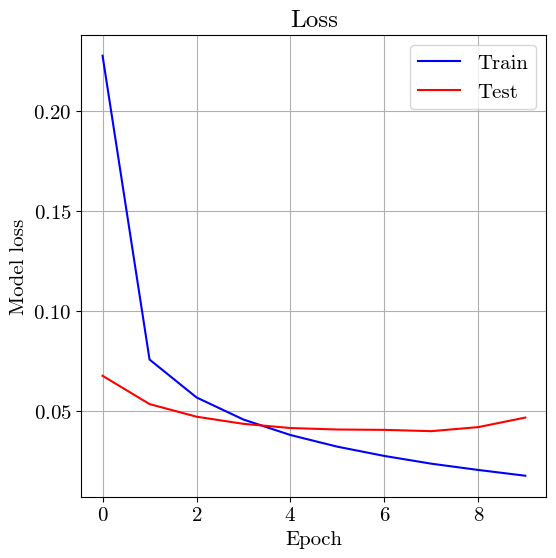

In [137]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(hs.history['acc'],color='b')
plt.plot(hs.history['val_acc'],color='r')
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.title('Accuracy')
plt.grid()
plt.show()

# summarize history for loss
plt.plot(hs.history['loss'],color='b')
plt.plot(hs.history['val_loss'],color='r')
plt.ylabel('Model loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.title('Loss')
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


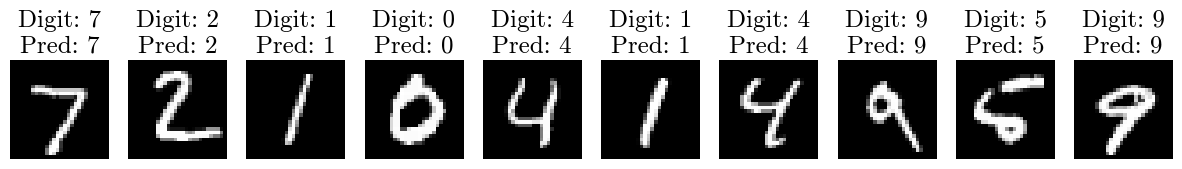

In [142]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPred: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

In the end, **<span style="color:red">add the evaluation of your CNN performances</span>** like that used for the DNN.

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

---
### Risoluzione
---

Una volta utilizzato `gimp` per scrivere a mano le cifre utilizzo le precedentti reti allenate per predire la cifra rappresentata. Vengono riportate due serie di immagini di cifre da $0$ a $9$ che ho disegnato a mano.

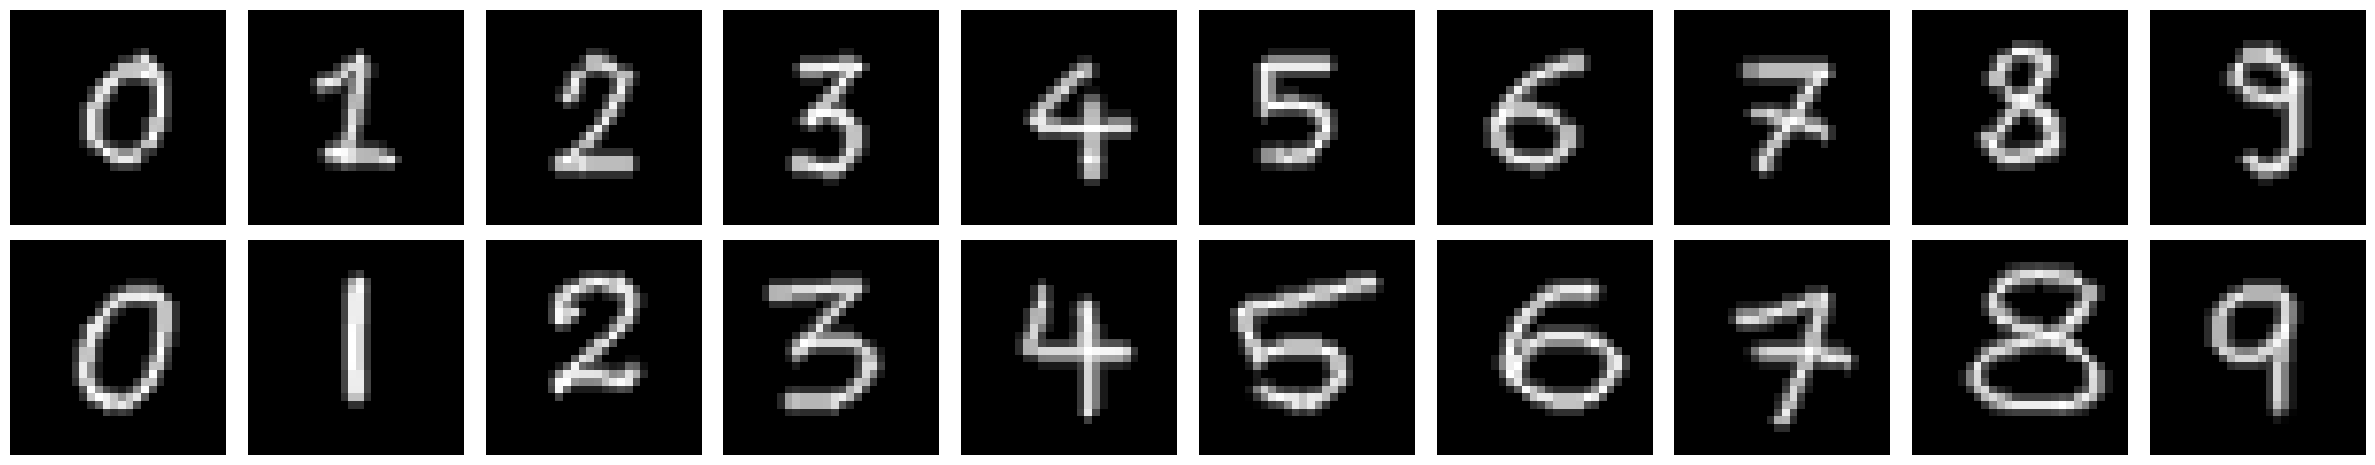

(28, 28)


In [143]:
from PIL import Image
import os
plt.figure(figsize=(24,5))
digit_filename = []
digit_in = []
pix = []
data = []
for k in range(0,10):
    digit_filename.append("./Pictures/"+str(k)+".png")
    digit_in.append(Image.open(digit_filename[k]).convert('L'))

    ydim, xdim = digit_in[k].size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix.append(digit_in[k].load());
    data.append(np.zeros((xdim, ydim)))
    for j in range(ydim):
        for i in range(xdim):
            data[k][i,j]=pix[k][j,i]

    data[k] /= 255

    plt.subplot(2,10,k+1)
    plt.imshow(data[k], cmap='gray')
    plt.axis('off')
for k in range(10,20):
    digit_filename.append("./Pictures/"+str(k-10)+"b.png")
    digit_in.append(Image.open(digit_filename[k]).convert('L'))

    ydim, xdim = digit_in[k].size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix.append(digit_in[k].load());
    data.append(np.zeros((xdim, ydim)))
    for j in range(ydim):
        for i in range(xdim):
            data[k][i,j]=pix[k][j,i]

    data[k] /= 255

    plt.subplot(2,10,k+1)
    plt.imshow(data[k], cmap='gray')
    plt.axis('off') 

plt.tight_layout()
plt.show()

print(data[0].shape)

Utillizzo la migliore delle **DNN** precedentemente allenate per predire le cifre:

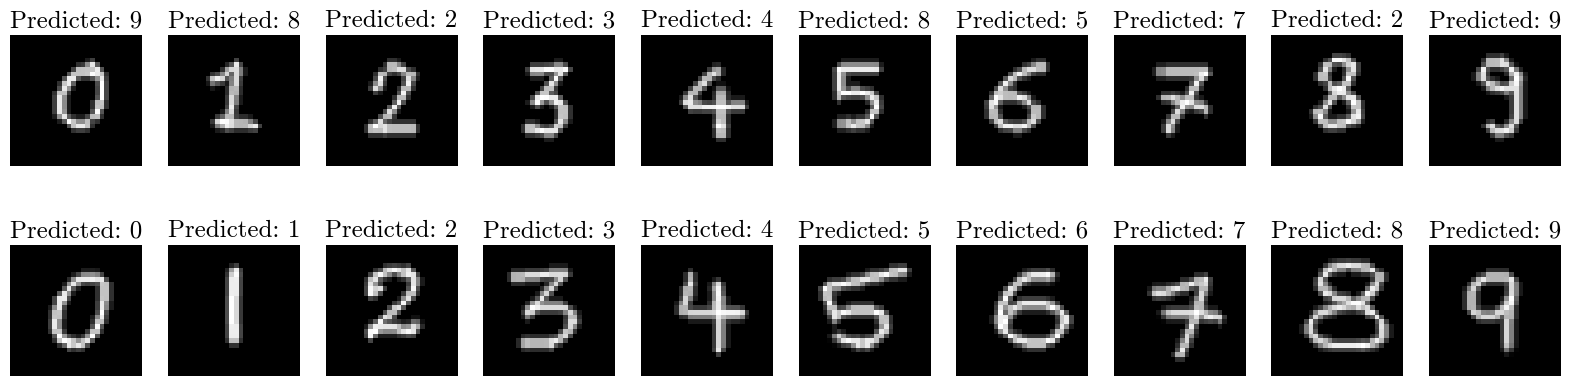

In [146]:
plt.figure(figsize=(20, 5)) 
for k in range(0,20):
#print(data.shape)
    data[k] = data[k].reshape(1,xdim*ydim)
#print(data.shape)
    pred_0 = model_DNN[1][0].predict(data[k],verbose=0)


    data[k] = data[k].reshape(xdim,ydim)

    plt.subplot(2,10,k+1)
    plt.imshow(data[k], cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(pred_0)))
    plt.axis('off') 
plt.show()

Utilizzo la **CNN** precedentemente utilizzata per predire le cifre:

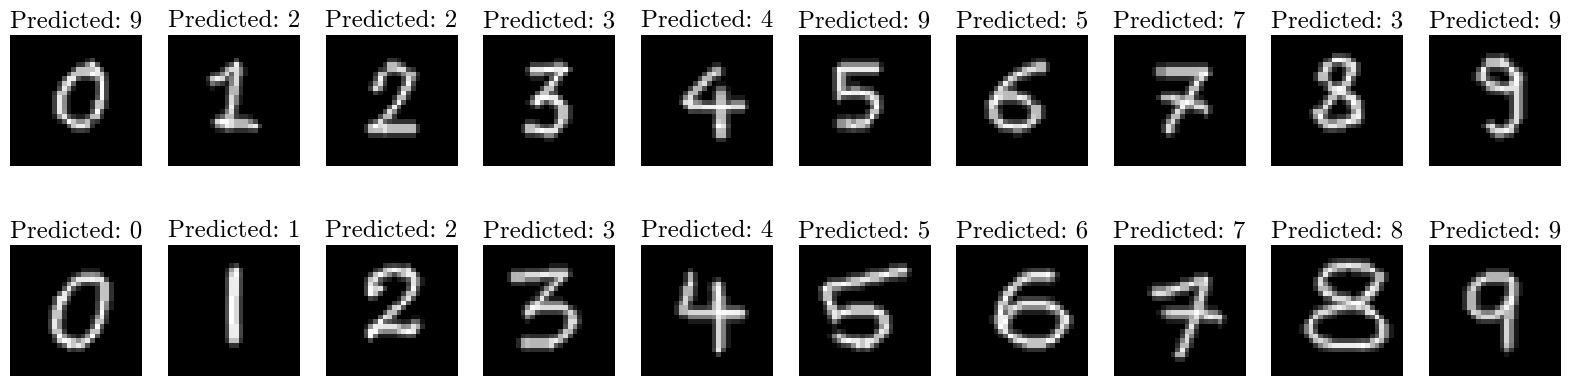

In [148]:
plt.figure(figsize=(20, 5)) 
for k in range(0,20):
#print(data.shape)
    data[k] = data[k].reshape(1,xdim,ydim,1)
#print(data.shape)
    pred_0 = model_CNN.predict(data[k],verbose=0)


    data[k] = data[k].reshape(xdim,ydim)

    plt.subplot(2,10,k+1)
    plt.imshow(data[k], cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(pred_0)))
    plt.axis('off') 
plt.show()

Osserviamo come sia la  miglior **DNN** che la **CNN** faticano nella predizione della prima serie di cifre ma hanno pienamente successo nella seconda